# 🗺️ Fundamentos de SIG y Python Geoespacial


Este notebook introduce los conceptos fundamentales de los Sistemas de Información Geográfica (SIG) y cómo trabajar con datos espaciales en Python usando bibliotecas como `geopandas` y `shapely`.


## 1. 🌍 ¿Qué es un SIG? Tipos de datos: ráster y vector


Un **Sistema de Información Geográfica (SIG)** permite capturar, almacenar, analizar y visualizar datos espaciales.
Los dos tipos principales de datos geoespaciales son:

- **Vectoriales**: representan objetos discretos como puntos (pozos), líneas (ríos) y polígonos (cuencas).
- **Ráster**: representan datos continuos como temperatura, elevación o uso del suelo, mediante una matriz de celdas.

En Python, trabajamos principalmente con datos vectoriales usando `GeoPandas`.


## 2. 🗂️ Introducción a `geopandas`: lectura y manejo de shapefiles


`geopandas` extiende `pandas` para trabajar con datos geográficos. Permite cargar archivos `.shp` y realizar análisis espaciales básicos.


In [13]:
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

latin1 es el nombre informal de la codificación ISO-8859-1, un estándar que representa caracteres del alfabeto latino occidental. Incluye letras como á, é, í, ó, ú, ñ, ç, y otros símbolos comunes en español, francés, alemán, etc.


In [2]:

# Leer un archivo shapefile
ruta_shp = r"C:\\Users\\lenovo.DESKTOP-NGHQ1VP\\OneDrive\\Documentos\\cursopy\\dia3\\subcuencas\\inegi_refsubcuen_1998.shp"
subcuencas = gpd.read_file(ruta_shp, encoding="latin1")

# Ver las primeras filas y el sistema de coordenadas
print(subcuencas.head())
print("CRS:", subcuencas.crs)


   gid  index  cov_id                           nombre     descripcio  \
0    1    1.0     3.0              Bacanora - Mejorada            Río   
1    2    2.0     5.0  Lago Salado - Arroyo del Diablo  Lago y arroyo   
2   38   38.0  3500.0                        No aplica          Islas   
3  464  464.0     0.0                        No aplica      No aplica   
4  465  465.0     0.0                        No aplica      No aplica   

        tipo     area_km2   perimetro  \
0  Subcuenca  5427.634231  685.468278   
1  Subcuenca  5601.634735  388.471255   
2  No aplica     0.214480    2.693014   
3  No aplica     0.010725    0.414252   
4  No aplica     0.010738    0.414502   

                                            geometry  
0  POLYGON ((-114.71678 32.71897, -114.74204 32.6...  
1  POLYGON ((-115.91004 32.29054, -115.90398 32.2...  
2  POLYGON ((-113.97721 31.5775, -113.97829 31.57...  
3  POLYGON ((-110.55227 27.4008, -110.5522 27.399...  
4  POLYGON ((-110.53222 27.39999, -110.

In [3]:
type(subcuencas['nombre'])

pandas.core.series.Series

## 3. 🔷 Introducción a `shapely`: geometrías y relaciones espaciales


`shapely` es la base geométrica de `geopandas`. Permite analizar geometrías como:

- Áreas y perímetros
- Centroides
- Intersecciones y uniones
- Contención espacial

Cada fila en un `GeoDataFrame` contiene una columna `geometry` que puede usarse para este análisis.


In [4]:

# Área y centroide de un polígono
area = subcuencas.geometry[0].area
centroide = subcuencas.geometry[0].centroid

print("Área:", area)
print("Centroide:", centroide)


Área: 0.5130710091296784
Centroide: POINT (-115.28600388276102 32.351530638059664)


## 4. 🖼️ Visualización de capas geográficas


`geopandas` permite trazar mapas rápidamente con `.plot()`. También se puede personalizar con `matplotlib` para agregar etiquetas, colores, leyendas, etc.

$$
a + b = c
$$


C:\Users\lenovo.DESKTOP-NGHQ1VP\AppData\Local\Temp\ipykernel_27712\2153526111.py:6: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


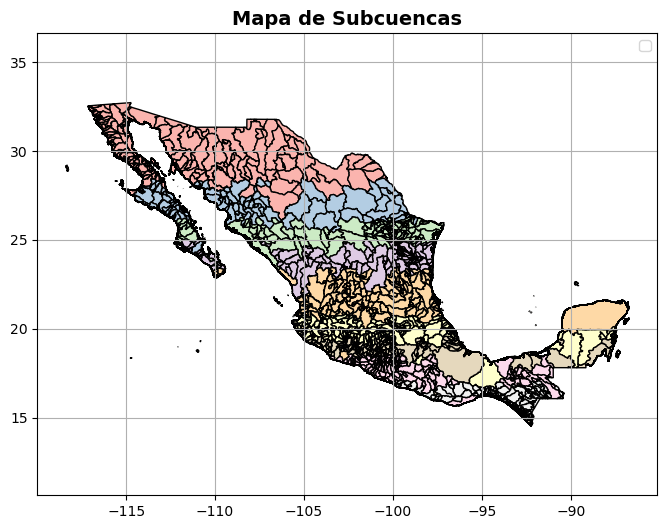

In [5]:
# Trazar las subcuencas
subcuencas.plot(edgecolor='black', cmap='Pastel1', figsize=(8, 6), label = 'Cuencas')
plt.title("Mapa de Subcuencas", fontsize=14, fontweight='bold')
plt.axis("equal")
plt.grid()
plt.legend()
plt.show()


## 5. 🧪 Ejercicio práctico: Cargar una capa de subcuencas y calcular áreas y centroides


En este ejercicio vamos a:

1. Cargar un archivo shapefile de subcuencas
2. Calcular el área de cada subcuenca en km²
3. Calcular el centroide de cada subcuenca
4. Agregar los resultados al `GeoDataFrame`


In [6]:
subcuencas.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
if subcuencas.crs and subcuencas.crs.is_geographic:
    # Para coordenadas geográficas en México, usar una proyección más apropiada
    # Intentar proyecciones específicas para México que minimizan distorsión de área
    try:
        # EPSG:6372 - Mexico ITRF2008 / UTM zone 12N (MÁS PRECISO según diagnóstico)
        subcuencas_proyectadas = subcuencas.to_crs('EPSG:6372')
        print("✅ Usando proyección UTM para México (EPSG:6372) - MÁS PRECISA")
    except:
        try:
            # EPSG:4485 - Mexico ITRF92 / Lambert Conformal Conic
            subcuencas_proyectadas = subcuencas.to_crs('EPSG:4485')
            print("Usando proyección Lambert Conformal Conic para México (EPSG:4485)")
        except:
            # Fallback a Web Mercator si las otras no están disponibles
            subcuencas_proyectadas = subcuencas.to_crs('EPSG:3857')
            print("⚠️ Usando Web Mercator (EPSG:3857) - puede tener distorsión de área")
    
    subcuencas['area_km2'] = subcuencas_proyectadas.geometry.area / 1_000_000  # Convertir m² a km²
else:
    # Si ya está en un sistema métrico
    subcuencas['area_km2'] = subcuencas.geometry.area / 1_000_000


✅ Usando proyección UTM para México (EPSG:6372) - MÁS PRECISA


In [8]:

# Calcular el centroide de cada subcuenca
subcuencas['centroide_x'] = subcuencas.geometry.centroid.x
subcuencas['centroide_y'] = subcuencas.geometry.centroid.y

# Mostrar los resultados
print("\nResultados calculados:")
print(f"Número de subcuencas: {len(subcuencas)}")
print(f"Área total: {subcuencas['area_km2'].sum():.2f} km²")
print(f"Área promedio: {subcuencas['area_km2'].mean():.2f} km²")
print(f"Área mínima: {subcuencas['area_km2'].min():.2f} km²")
print(f"Área máxima: {subcuencas['area_km2'].max():.2f} km²")



Resultados calculados:
Número de subcuencas: 3115
Área total: 1942500.22 km²
Área promedio: 623.60 km²
Área mínima: 0.00 km²
Área máxima: 56751.87 km²


C:\Users\lenovo.DESKTOP-NGHQ1VP\AppData\Local\Temp\ipykernel_27712\2076733189.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  subcuencas['centroide_x'] = subcuencas.geometry.centroid.x
C:\Users\lenovo.DESKTOP-NGHQ1VP\AppData\Local\Temp\ipykernel_27712\2076733189.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  subcuencas['centroide_y'] = subcuencas.geometry.centroid.y


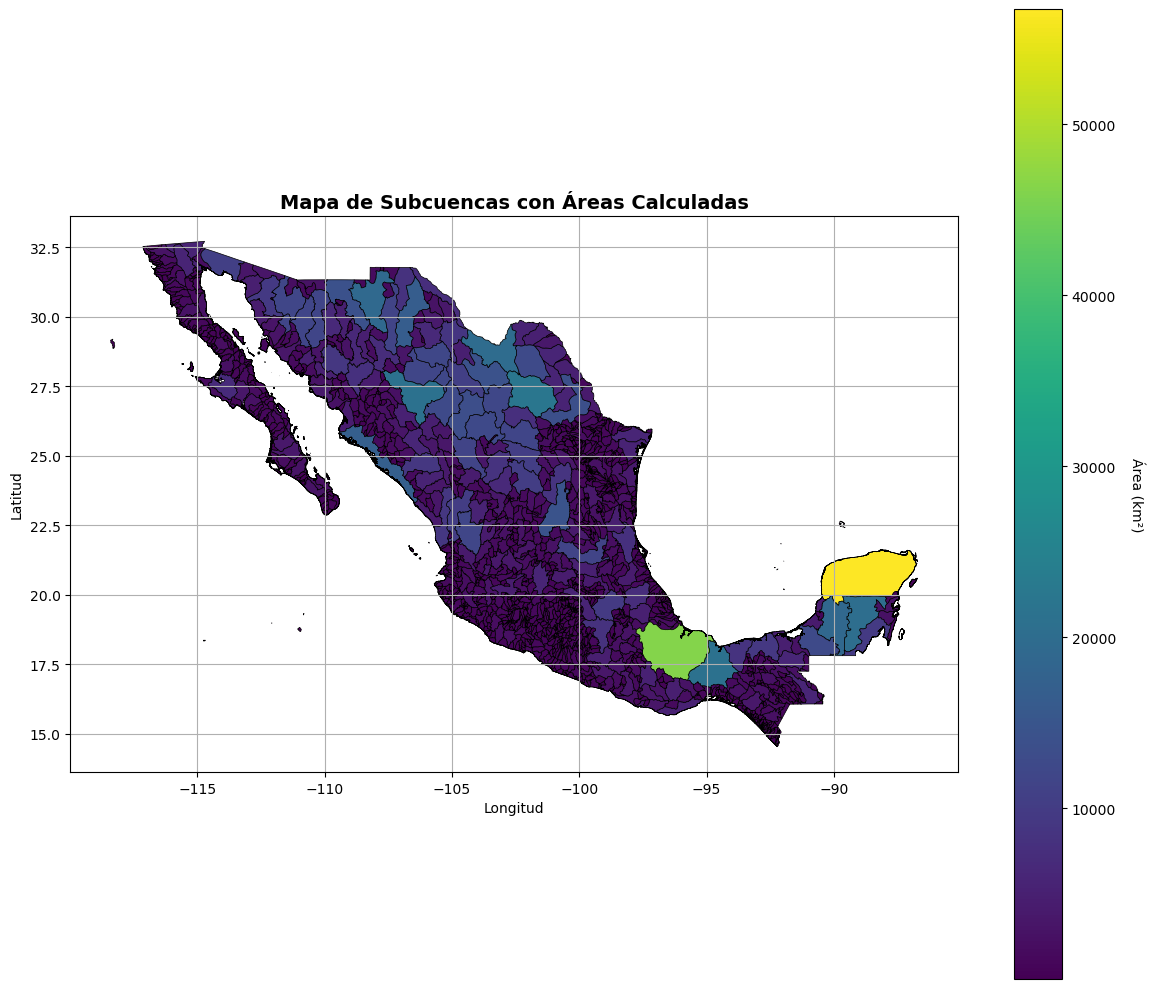

In [9]:
# Crear un mapa más informativo mostrando las áreas
fig, ax = plt.subplots(figsize=(12, 10))

# Plotear las subcuencas con colores según el área
plot = subcuencas.plot(column='area_km2', cmap='viridis', edgecolor='black', 
                       linewidth=0.5, ax=ax, legend=True)

plt.title("Mapa de Subcuencas con Áreas Calculadas", fontsize=14, fontweight='bold')
plt.xlabel("Longitud")
plt.ylabel("Latitud")

# Ajustar la leyenda
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel('Área (km²)', rotation=270, labelpad=20)

plt.grid()
plt.tight_layout()
plt.show()

In [15]:
print("\n" + "="*50)
print("ANÁLISIS POR RANGOS DE ÁREA")
print("="*50)

# Crear categorías de tamaño (MEJORADA - más realista para hidrología)
def categorizar_area(area):
    if area < 10:
        return "Micro (<10 km²)"
    elif area < 50:
        return "Muy Pequeña (10-50 km²)"
    elif area < 200:
        return "Pequeña (50-200 km²)"
    elif area < 500:
        return "Mediana (200-500 km²)"
    elif area < 1000:
        return "Grande (500-1000 km²)"
    elif area < 2500:
        return "Muy Grande (1000-2500 km²)"
    else:
        return "Macro (>2500 km²)"

subcuencas['categoria_tamaño'] = subcuencas['area_km2'].apply(categorizar_area)

# Contar subcuencas por categoría
resumen_categorias = subcuencas.groupby('categoria_tamaño').agg({
    'area_km2': ['count', 'sum', 'mean']
}).round(2)

print("Distribución por categorías de tamaño:")
print(resumen_categorias)

# 2. Identificar subcuencas extremas
print("\n" + "="*50)
print("SUBCUENCAS EXTREMAS")
print("="*50)

# Subcuenca más grande
mayor = subcuencas.loc[subcuencas['area_km2'].idxmax()]
print(f"Subcuenca MÁS GRANDE:")
print(f"  Área: {mayor['area_km2']:.2f} km²")
print(f"  Centroide: ({mayor['centroide_x']:.4f}, {mayor['centroide_y']:.4f})")

# Subcuenca más pequeña
menor = subcuencas.loc[subcuencas['area_km2'].idxmin()]
print(f"\nSubcuenca MÁS PEQUEÑA:")
print(f"  Área: {menor['area_km2']:.2f} km²")
print(f"  Centroide: ({menor['centroide_x']:.4f}, {menor['centroide_y']:.4f})")


ANÁLISIS POR RANGOS DE ÁREA
Distribución por categorías de tamaño:
                           area_km2                     
                              count         sum     mean
categoria_tamaño                                        
Grande (500-1000 km²)           244   174662.88   715.83
Macro (>2500 km²)               173  1208975.88  6988.30
Mediana (200-500 km²)           411   137421.98   334.36
Micro (<10 km²)                1524      987.11     0.65
Muy Grande (1000-2500 km²)      238   374976.84  1575.53
Muy Pequeña (10-50 km²)         176     4962.06    28.19
Pequeña (50-200 km²)            349    40513.47   116.08

SUBCUENCAS EXTREMAS
Subcuenca MÁS GRANDE:
  Área: 56751.87 km²
  Centroide: (-88.6992, 20.6954)

Subcuenca MÁS PEQUEÑA:
  Área: 0.00 km²
  Centroide: (-111.2549, 24.2328)


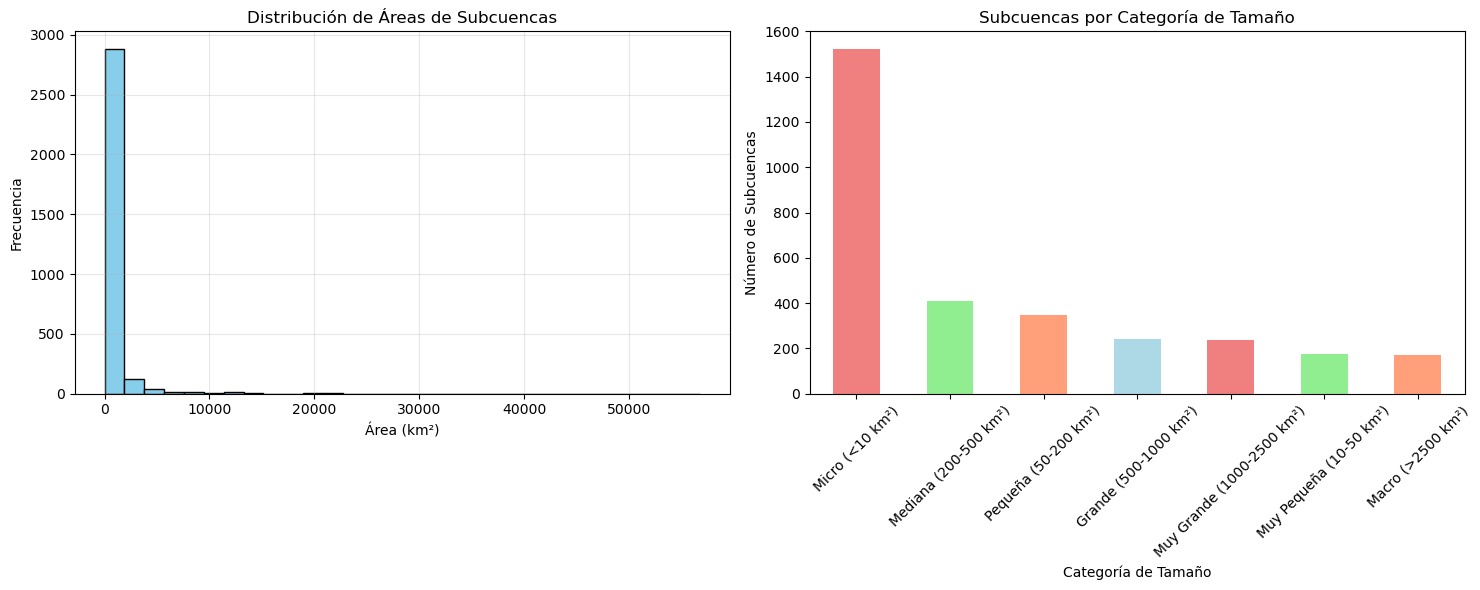

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histograma
subcuencas['area_km2'].hist(bins=30, ax=ax1, color='skyblue', edgecolor='black')
ax1.set_xlabel('Área (km²)')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución de Áreas de Subcuencas')
ax1.grid(True, alpha=0.3)

# Gráfico de barras por categorías
categoria_counts = subcuencas['categoria_tamaño'].value_counts()
categoria_counts.plot(kind='bar', ax=ax2, color=['lightcoral', 'lightgreen', 'lightsalmon', 'lightblue'])
ax2.set_xlabel('Categoría de Tamaño')
ax2.set_ylabel('Número de Subcuencas')
ax2.set_title('Subcuencas por Categoría de Tamaño')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

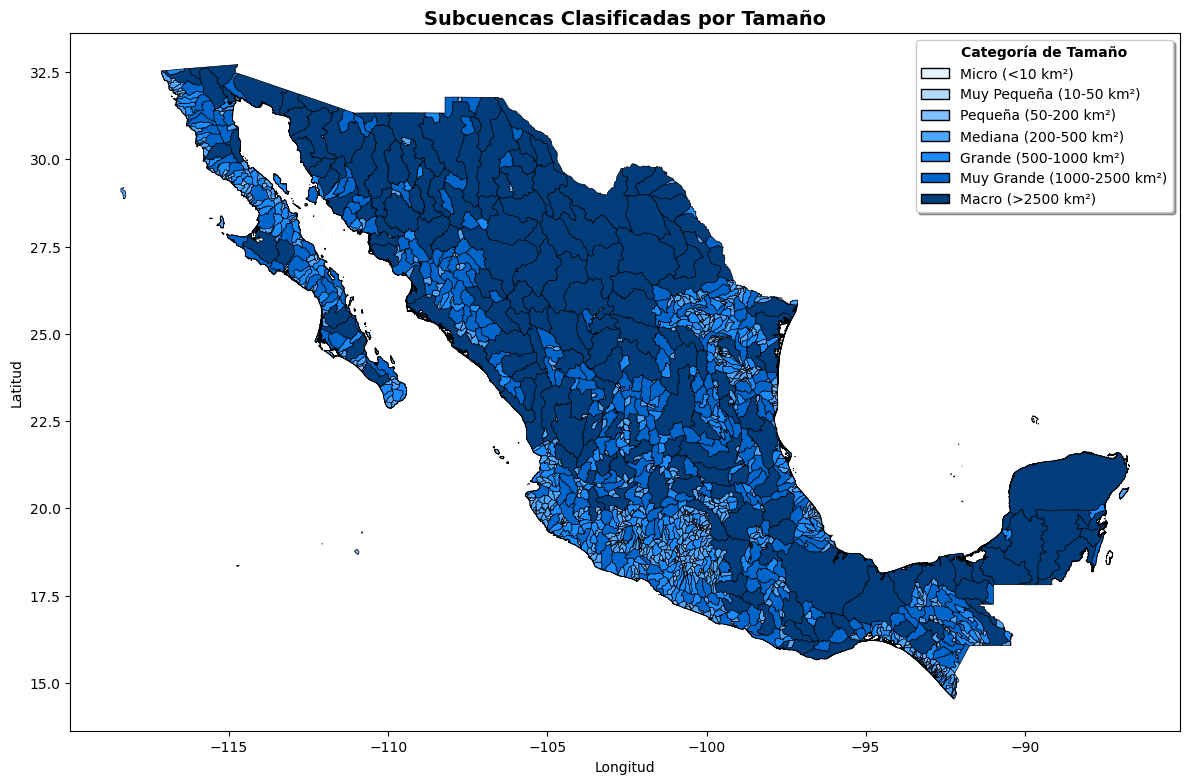

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))  # Tamaño normal

# Definir colores para cada categoría (MEJORADO - gradiente más suave)
colores_categoria = {
    'Micro (<10 km²)': '#e6f3ff',           # Azul muy claro
    'Muy Pequeña (10-50 km²)': '#b3d9ff',   # Azul claro
    'Pequeña (50-200 km²)': '#80bfff',      # Azul medio
    'Mediana (200-500 km²)': '#4da6ff',     # Azul
    'Grande (500-1000 km²)': '#1a8cff',     # Azul fuerte
    'Muy Grande (1000-2500 km²)': '#0066cc', # Azul oscuro
    'Macro (>2500 km²)': '#003d7a'          # Azul muy oscuro
}

# Plotear por categorías y guardar handles para la leyenda
handles = []
labels = []

for categoria, color in colores_categoria.items():
    subset = subcuencas[subcuencas['categoria_tamaño'] == categoria]
    if not subset.empty:
        # Plotear la categoría
        plot_handle = subset.plot(ax=ax, color=color, edgecolor='black', linewidth=0.5)
        
        # Crear handle manual para la leyenda
        patch = Patch(facecolor=color, edgecolor='black', label=categoria)
        handles.append(patch)
        labels.append(categoria)

ax.set_title('Subcuencas Clasificadas por Tamaño', fontsize=14, fontweight='bold')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Crear leyenda manual con los handles y labels
legend = ax.legend(handles=handles, labels=labels,
                  title='Categoría de Tamaño', 
                  loc='upper right',  # Leyenda dentro del mapa
                  frameon=True,
                  fancybox=True,
                  shadow=True)
legend.set_title('Categoría de Tamaño', prop={'weight': 'bold'})

plt.tight_layout()
plt.show()


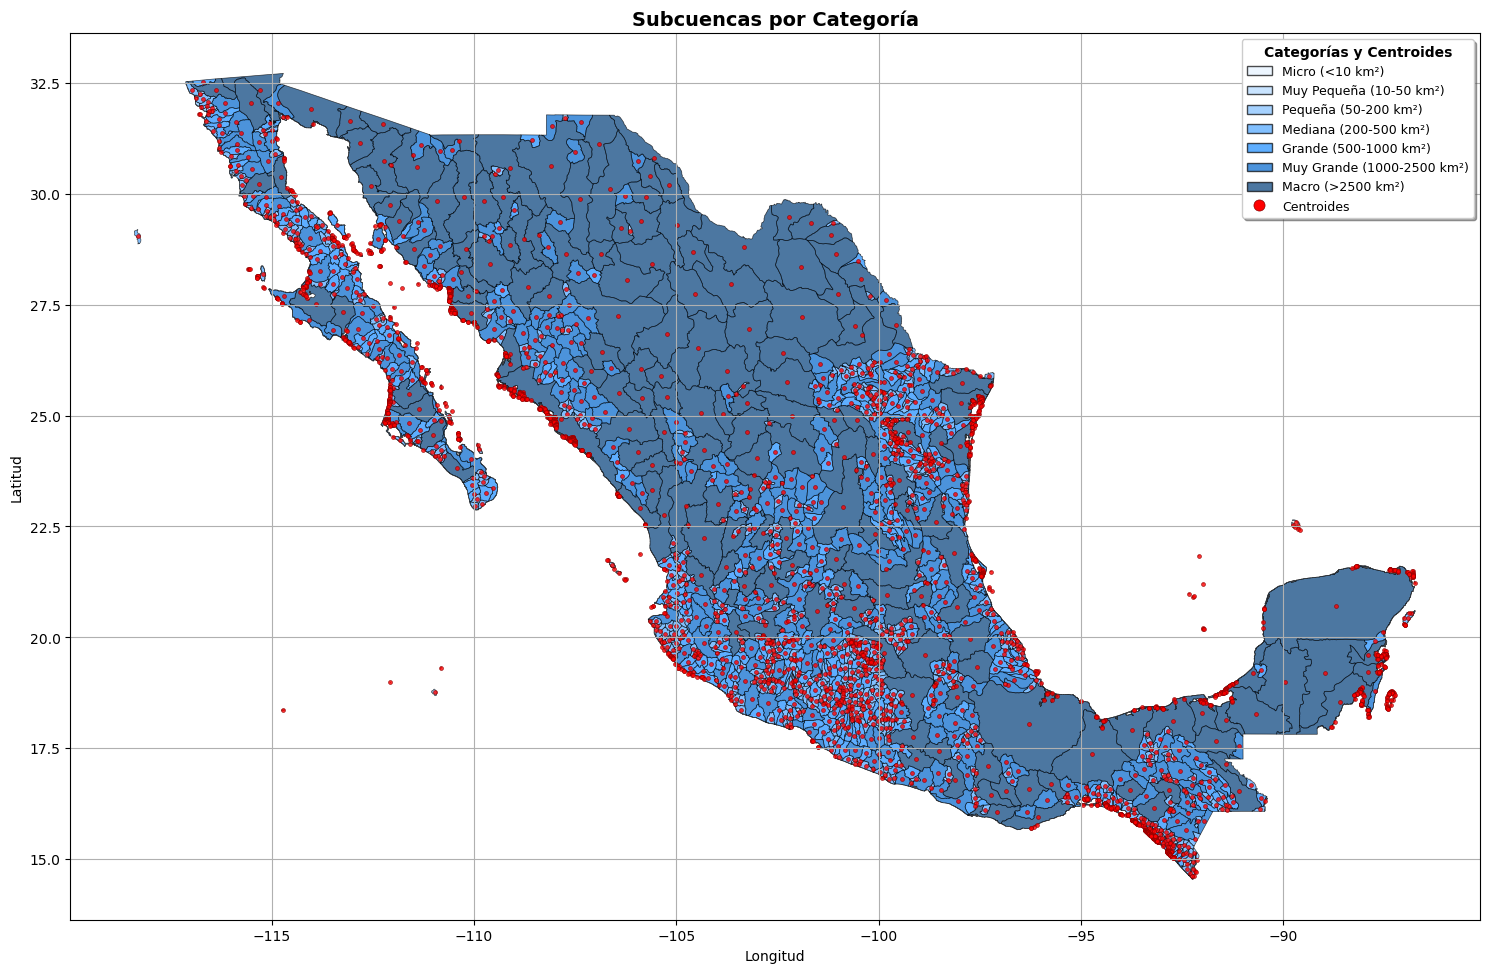

In [24]:
# Crear mapa con subcuencas y centroides
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Plotear subcuencas por categorías (base del mapa)
for categoria, color in colores_categoria.items():
    subset = subcuencas[subcuencas['categoria_tamaño'] == categoria]
    if not subset.empty:
        subset.plot(ax=ax, color=color, edgecolor='black', linewidth=0.5, alpha=0.7)

# Plotear centroides como puntos rojos
centroides_x = subcuencas['centroide_x']
centroides_y = subcuencas['centroide_y']
ax.scatter(centroides_x, centroides_y, 
          c='red', s=8, alpha=0.8, 
          edgecolor='darkred', linewidth=0.5,
          label='Centroides')

# Configurar el mapa
ax.set_title('Subcuencas por Categoría', 
            fontsize=14, fontweight='bold')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Crear leyenda combinada
# Handles para categorías de subcuencas
handles_categorias = []
for categoria, color in colores_categoria.items():
    if categoria in subcuencas['categoria_tamaño'].values:
        patch = Patch(facecolor=color, edgecolor='black', label=categoria, alpha=0.7)
        handles_categorias.append(patch)

# Handle para centroides
from matplotlib.lines import Line2D
handle_centroides = Line2D([0], [0], marker='o', color='w', 
                          markerfacecolor='red', markersize=8, 
                          markeredgecolor='darkred', markeredgewidth=0.5,
                          label='Centroides', linestyle='None')

# Combinar handles
all_handles = handles_categorias + [handle_centroides]

# Crear leyenda
legend = ax.legend(handles=all_handles,
                  title='Categorías y Centroides', 
                  loc='upper right',
                  frameon=True,
                  fancybox=True,
                  shadow=True,
                  fontsize=9)
legend.set_title('Categorías y Centroides', prop={'weight': 'bold'})

plt.tight_layout()
plt.grid(True)
plt.show()

## 🍰 GRÁFICA DE PASTEL

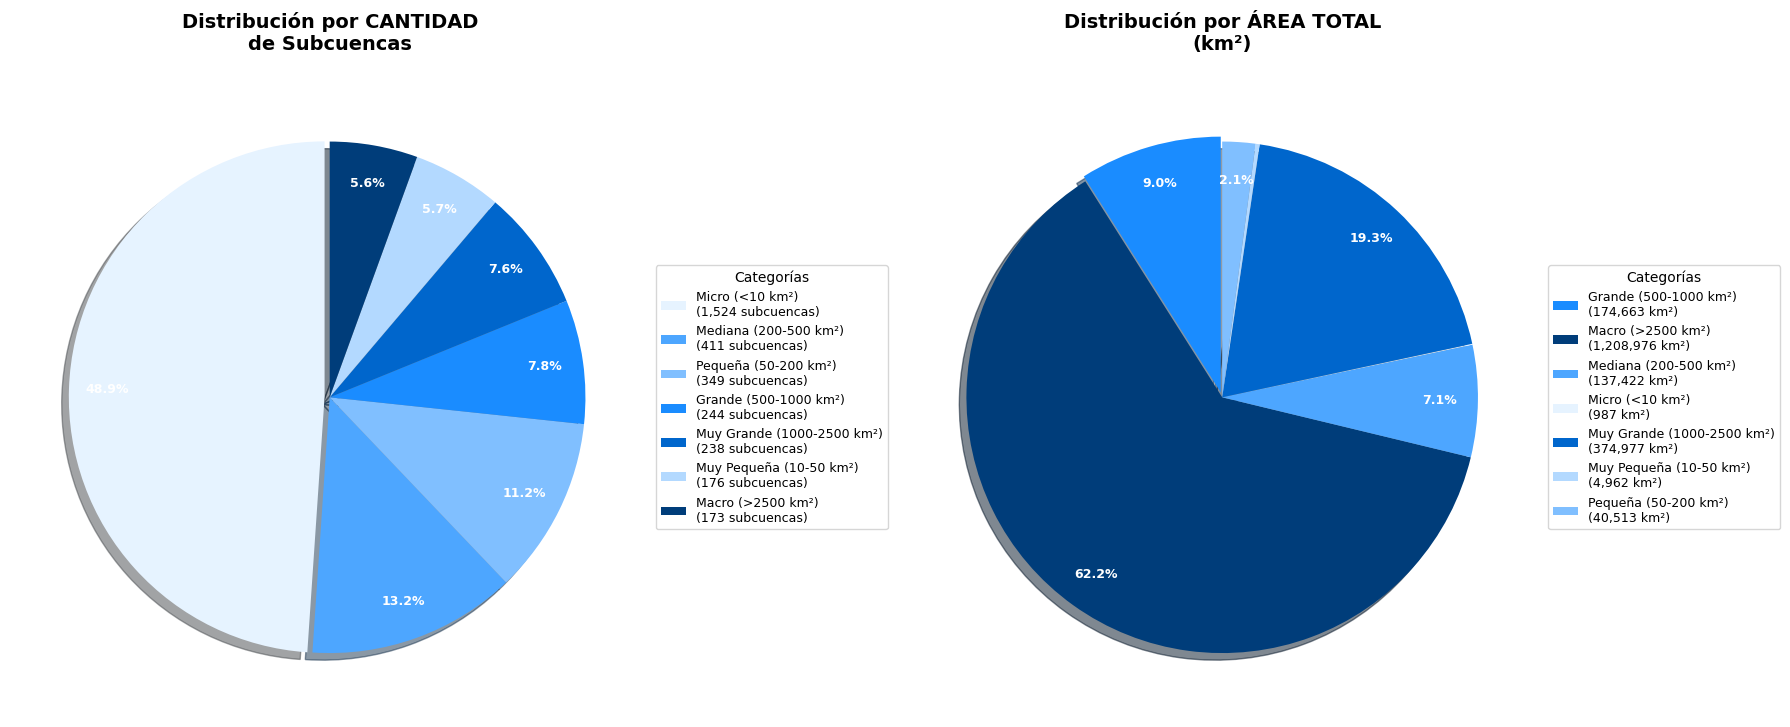

In [18]:
# Crear gráfica de pastel para las categorías
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# Datos para el pie chart
categoria_counts = subcuencas['categoria_tamaño'].value_counts()
categoria_areas = subcuencas.groupby('categoria_tamaño')['area_km2'].sum()

# Colores personalizados para el pie chart (mismos que el mapa)
colores_pie = [colores_categoria[cat] for cat in categoria_counts.index]

# Función para mostrar solo porcentajes mayores al 2%
def autopct_format(pct):
    return f'{pct:.1f}%' if pct > 2 else ''

# Pie chart por CANTIDAD de subcuencas
wedges1, texts1, autotexts1 = ax1.pie(categoria_counts.values, 
                                      autopct=autopct_format,
                                      colors=colores_pie,
                                      explode=[0.02 if i == 0 else 0 for i in range(len(categoria_counts))],
                                      shadow=True,
                                      startangle=90,
                                      pctdistance=0.85)

ax1.set_title('Distribución por CANTIDAD\nde Subcuencas', fontsize=14, fontweight='bold', pad=20)

# Mejorar formato del primer pie chart
for autotext in autotexts1:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

# Leyenda para el primer gráfico
ax1.legend(wedges1, [f"{cat}\n({count:,} subcuencas)" for cat, count in categoria_counts.items()],
          title="Categorías",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=9)

# Pie chart por ÁREA total
colores_pie2 = [colores_categoria[cat] for cat in categoria_areas.index]
wedges2, texts2, autotexts2 = ax2.pie(categoria_areas.values,
                                      autopct=autopct_format,
                                      colors=colores_pie2,
                                      explode=[0.02 if i == 0 else 0 for i in range(len(categoria_areas))],
                                      shadow=True,
                                      startangle=90,
                                      pctdistance=0.85)

ax2.set_title('Distribución por ÁREA TOTAL\n(km²)', fontsize=14, fontweight='bold', pad=20)

# Mejorar formato del segundo pie chart
for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

# Leyenda para el segundo gráfico
ax2.legend(wedges2, [f"{cat}\n({area:,.0f} km²)" for cat, area in categoria_areas.items()],
          title="Categorías",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=9)

# Ajustar espaciado
plt.tight_layout()
plt.show()

In [19]:
subcuencas.to_file("subcuencas_resultados_finales.shp")
print("✓ Archivo shapefile guardado: subcuencas_resultados_finales.shp")

C:\Users\lenovo.DESKTOP-NGHQ1VP\AppData\Local\Temp\ipykernel_27712\1768397543.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  subcuencas.to_file("subcuencas_resultados_finales.shp")


✓ Archivo shapefile guardado: subcuencas_resultados_finales.shp


C:\Users\lenovo.DESKTOP-NGHQ1VP\anaconda3\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'centroide_x' to 'centroide_'
  ogr_write(
C:\Users\lenovo.DESKTOP-NGHQ1VP\anaconda3\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'centroide_y' to 'centroid_1'
  ogr_write(
C:\Users\lenovo.DESKTOP-NGHQ1VP\anaconda3\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'categoria_tamaño' to 'categoria_'
  ogr_write(


## ⛓️‍💥Links interesantes
https://www.gits.igg.unam.mx/idea/inicio

https://geopandas.org/en/stable/

https://shapely.readthedocs.io/en/stable/


---

📘 *Este notebook ha sido elaborado por* **José María García Márquez** *para el curso*  
**"Python Aplicado a la Hidráulica con Integración en Sistemas de Información Geográfica (SIG)"**

---
